<a href="https://colab.research.google.com/github/LoaiMB/AI_Workshop_Ar/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

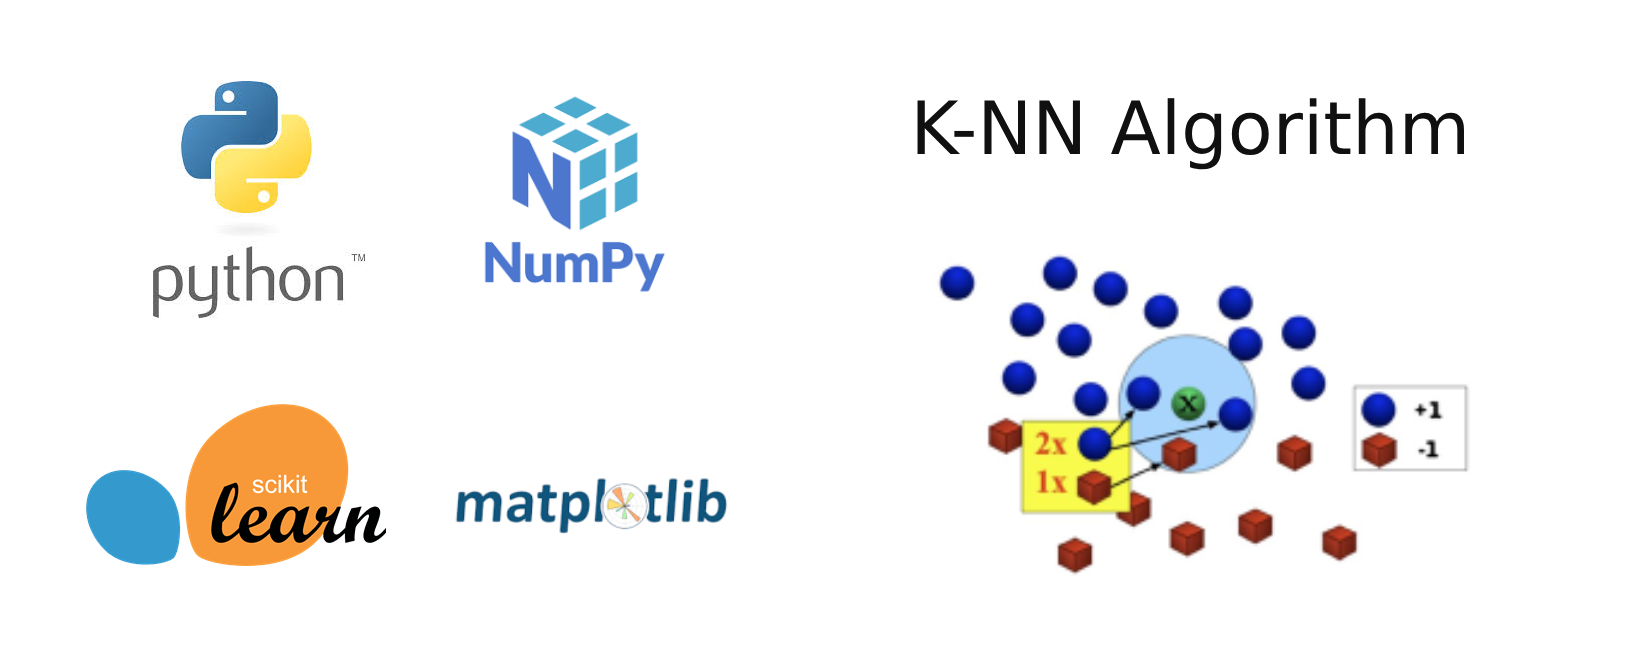

# **مقدمة**
K-Nearest Neighbors (K-NN):  
هي خوارزمية يمكن استخدامها لكل من مهام التصنيف والانحدار. وهي تعمل على أساس مقاييس المسافة، حيث تعتمد التوقعات على الفئة الأكثر شيوعًا بين أقرب الجيران لكل نقطة بيانات

## **تحميل المكتبات و قاعدة البيانات**

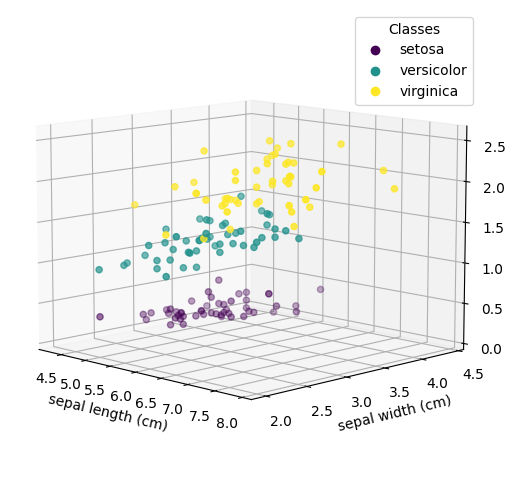

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = load_iris()

X = data.data
Y = data.target

# Assuming X is your feature data (shape: [n_samples, 3])
# and Y is your target variable (shape: [n_samples])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 3], c=Y)

ax.set_xlabel(data.feature_names[0])
ax.set_ylabel(data.feature_names[1])
ax.set_zlabel(data.feature_names[2])

ax.legend(
    scatter.legend_elements()[0], data.target_names, loc="best", title="Classes"
)
ax.view_init(elev=10, azim=-45)  # Example: elev for elevation, azim for azimuth
plt.tight_layout()
plt.show()

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features for better distance computation
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **تنفيذ الخوارزمية**

In [ ]:
# Define the Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Define a simple K-NN classifier class with a single predict function
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            # Compute distances between x and all points in the training set
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

            # Get indices of the k-nearest neighbors
            k_indices = np.argsort(distances)[:self.k]

            # Extract the labels of the nearest neighbors
            k_nearest_labels = [self.y_train[i] for i in k_indices]

            # Most common label among the neighbors
            most_common = np.bincount(k_nearest_labels).argmax()
            predictions.append(most_common)
        return np.array(predictions)

# Instantiate and train the KNN classifier
k = 3
knn = KNN(k=k)
knn.fit(X_train, Y_train)

# Predict on the test set and calculate accuracy
predictions = knn.predict(X_test)
print(predictions)
accuracy = np.sum(predictions == Y_test) / len(Y_test)
print(f"K-NN model accuracy with k={k}: {accuracy * 100:.2f}%")


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
K-NN model accuracy with k=3: 100.00%


# **K تأثير قيمة**

In [ ]:
# Effect of k on Model Accuracy

# Define a range of k values to test
k_values = range(1, len(Y_train),10)  # Test k from 1 to 20
accuracies = []

# Loop over different values of k and evaluate accuracy
for k in k_values:
    knn = KNN(k=k)       # Instantiate the KNN model with the current k
    knn.fit(X_train, Y_train)  # Train on the training data
    predictions = knn.predict(X_test)  # Make predictions on the test set

    # Calculate accuracy and store it
    acc = np.sum(predictions == Y_test) / len(Y_test)
    accuracies.append(acc)

# Plot the accuracy as a function of k
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Effect of k on K-NN Model Accuracy')
plt.grid(True)
plt.show()

# **رسم حدود القرار**

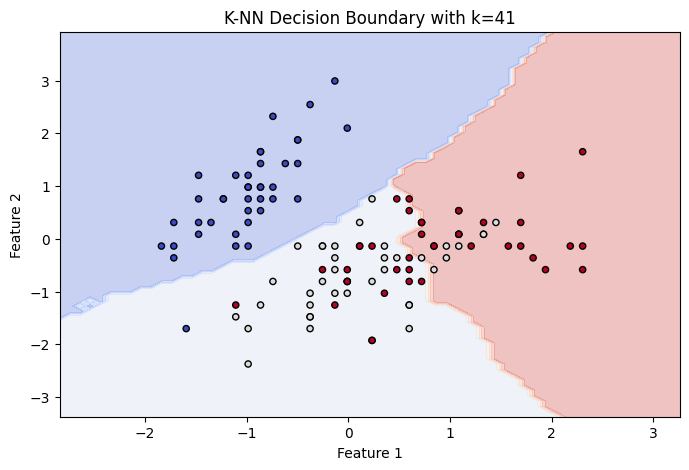

In [ ]:
# Visualization: Plot decision boundary for 2D data
# (using only first two features for simplicity)

def plot_decision_boundary(knn, X, y, h=0.1):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"K-NN Decision Boundary with k={knn.k}")
    plt.show()

X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]

knn = KNN(41)
knn.fit(X_train_2D, Y_train)
# Plot using only the first two features
plot_decision_boundary(knn, X_train[:, :2], Y_train)


# **Scikit-Learn's K-Neighbors Classifier استخدام**

In [ ]:
# Importing KNeighborsClassifier from scikit-learn for comparison
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Using scikit-learn's implementation
k = 33
knn_sk = KNeighborsClassifier(n_neighbors=k)
knn_sk.fit(X_train, Y_train)
pred_sk = knn_sk.predict(X_test)

# Evaluate the scikit-learn model
acc_sk = accuracy_score(Y_test, pred_sk)
print(f"Scikit-learn K-NN accuracy with k={k}: {acc_sk * 100:.2f}%")


Scikit-learn K-NN accuracy with k=33: 96.67%
